In [399]:
# import packages
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import math

In [400]:
# need category name and identity of spedific stuudent
col_list = ["Student.No", "Student.Semester.No","Grade.Points.Num", "Type"]
df = pd.read_csv("D:/MSCS/thesis2/final-codes-for-paper/transcript_data_with_course_grades_levels.csv", usecols=col_list)

**Prepare data**

In [401]:
def data_of_single_student(df, student_no):
    # empty nested dictionary to store data of all categories
    nested_dic = {}
    # Need to define the student number with category 
    # Here array belongs to type of all category
    type_arr = ['P','PL','NP','MT','EE', 'EL','MG', 'SS', 'SL']
    #list to store the only category types which student take
    type_list = []
    for i in range(len(type_arr)):
        cat_df = df.loc[(df['Student.No'] == student_no) & (df['Type'] == type_arr[i])]
        if cat_df.empty:
            print(type_arr[i], " is empty")
        else:
            type_list.append(type_arr[i])
            cat_df = cat_df.sort_values(by='Student.Semester.No')
            # dictionary that all grade points of single semester 
            semwise_dict = defaultdict(list)
            unique_sem = cat_df['Student.Semester.No'].unique()
            # loop till total number of semesters
            for j in range(len(unique_sem)):
                df_semwise = cat_df.loc[(cat_df['Student.Semester.No'] == unique_sem[j])]
                col_values = df_semwise['Grade.Points.Num'].values
                semwise_dict[unique_sem[j]] = col_values.tolist()

            nested_dic[i] = semwise_dict
    return nested_dic, type_list

In [407]:
nested_dic, type_list = data_of_single_student(df, 506)

SL  is empty


**For single category customize line chart**

In [403]:
def single_category_customize_line_chart(data, category_type):
    # maximum key value for the x-axis range
    n = max(data.keys())

    # to maintain the order keys are sorted
    sorted_keys = sorted(data.keys())

    # Plotting points for each key
    for i in range(len(sorted_keys)):
        x1 = sorted_keys[i]
        y_values = data[x1]

        # If only one point exist in single category
        if len(y_values) == 1:
            plt.scatter(x1, y_values[0], color='red')

        # If points are more than one then min and max points are connected and intermidiate points are plot as dots
        if i < len(sorted_keys) - 1:
            x2 = sorted_keys[i + 1]
            y1_min, y1_max = min(data[x1]), max(data[x1])
            y2_min, y2_max = min(data[x2]), max(data[x2])

            # for min points plot
            plt.plot([x1, x2], [y1_min, y2_min], marker='o', linestyle='-', color='red')

            # for max points plot
            plt.plot([x1, x2], [y1_max, y2_max], marker='o', linestyle='-', color='red')

            # Plot the intermediate points plot
            for y in data[x1]:
                if y != y1_min and y != y1_max:
                    plt.scatter(x1, y, color='red')
            for y in data[x2]:
                if y != y2_min and y != y2_max:
                    plt.scatter(x2, y, color='red')

    plt.xlim(1, n)
    plt.xticks(sorted_keys, [f'S-{i}' for i in sorted_keys], rotation=45)  # Only include x-axis points where data exists

    plt.xlabel('Semesters')
    plt.ylabel('Grade Points')
    plt.title(f'Student Trajectory {category_type}')

    plt.grid(True)
    plt.ylim(-0.5, 4.5)
    plt.xlim(-0.01, n + 0.9)

    plt.show()

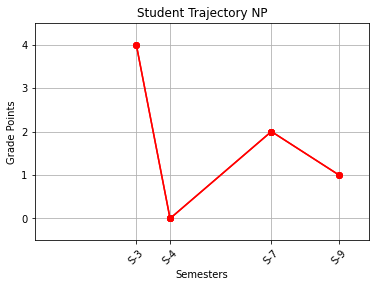

In [408]:
single_category_customize_line_chart(nested_dic[5], "NP")

**For multiple category customize line chart**

In [405]:
def multiple_categories_customize_line_chart(data, type_list):
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    # Number of rows and columns for the subplots in single frame
    num_plots = len(dict(data))
    num_cols = int(math.ceil(math.sqrt(num_plots)))
    num_rows = int(math.ceil(num_plots / num_cols))
    
    colors = cm.rainbow(np.linspace(0, 1, num_plots))
    
    # Grid of subplots with rows and columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))
    count = 0
    axes = axes.flatten()  # for easy iteration flat the axes

    # Iterate for line chart creation
    for ax, plot_data in zip(axes[:num_plots], dict(nested_dic).values()):
        color = colors[count % len(colors)]
        
        # Maximum key for the x-axis
        n = max(plot_data.keys())

        # Ordering the keys
        sorted_keys = sorted(plot_data.keys())

        # For each key plot line chart
        for i in range(len(sorted_keys)):
            x1 = sorted_keys[i]
            y_values = plot_data[x1]

            # If only one point exist in single category
            if len(y_values) == 1:
                ax.scatter(x1, y_values[0], color=color)

            # If more then one points exist than connect the min and max points and intemediate points as dots
            if i < len(sorted_keys) - 1:
                x2 = sorted_keys[i + 1]
                y1_min, y1_max = min(plot_data[x1]), max(plot_data[x1])
                y2_min, y2_max = min(plot_data[x2]), max(plot_data[x2])

                # for min points
                ax.plot([x1, x2], [y1_min, y2_min], marker='o', linestyle='-', color=color)

                # for max points
                ax.plot([x1, x2], [y1_max, y2_max], marker='o', linestyle='-', color=color)

                # Intermediate points
                for y in plot_data[x1]:
                    if y != y1_min and y != y1_max:
                        ax.scatter(x1, y, color=color)
                for y in plot_data[x2]:
                    if y != y2_min and y != y2_max:
                        ax.scatter(x2, y, color=color)

        ax.set_xlim(1, n)
        # Only include x-axis points where data exists
        ax.set_xticks(sorted_keys)
        ax.set_xticklabels([f'S-{i}' for i in sorted_keys], rotation=45)

        ax.set_xlabel('Semesters')
        ax.set_ylabel('Grade Points')
        abc = "123"
        ax.set_title('Student Trajectory('+f'{type_list[count]})')
        count = count + 1

        ax.grid(True)
        ax.set_ylim(-0.5, 4.5)
        ax.set_xlim(-0.01, n + 0.9)

    # unused subplot axes hide
    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

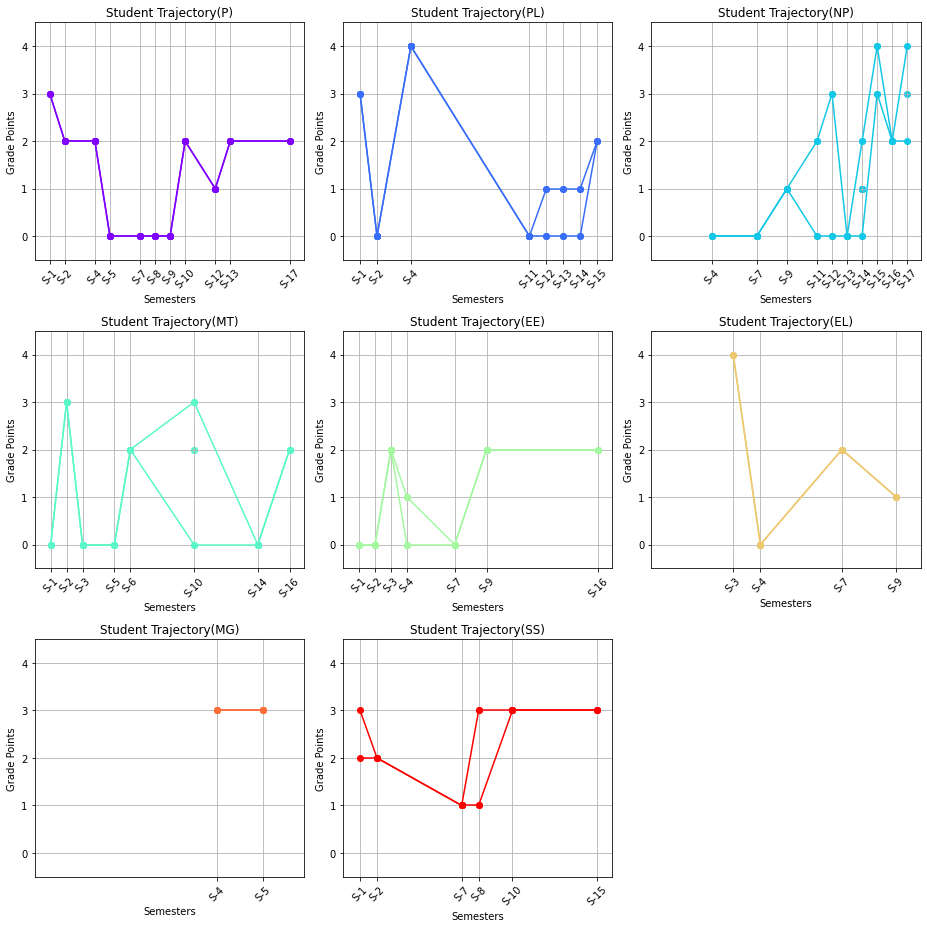

In [409]:
multiple_categories_customize_line_chart(nested_dic, type_list)